# La consigna decia que podiamos poner tantos notebooks como nos parezca, quizas podemos hacer uno sobre los datos, como preprocesamos etc y otro sobre los modelos?? ni idea, desp vemos que formato nos copa, x ahora le puse este nombre al archivo pero desp cambiamos segun nos parezca

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
from src.utils import filtrar_meses, verificar_columnas_y_tipos, estandarizar_nombres_columnas
from src.utils import funciones 

In [3]:
ruta_24 = "data/recorridos/raw/trips_2024.csv"
data_24 = pd.read_csv(ruta_24)
meses_a_eliminar = [8, 9, 10, 11, 12]
data_pr_24_a, filas_eliminadas_a = filtrar_meses(data_24, "fecha_origen_recorrido", meses_a_eliminar)
print(f"Se eliminaron {filas_eliminadas_a} filas.")
data_pr_24, filas_eliminadas = filtrar_meses(data_pr_24_a, "fecha_destino_recorrido", meses_a_eliminar)
print(f"Se eliminaron {filas_eliminadas} filas.")
ruta_salida = "data/recorridos/processed/trips_2024_pr.csv"
data_pr_24.to_csv(ruta_salida, index=False) #elimina los viajes que arrnacaron desde agosto en adelante y tambien aquellos terminados en agosto 
#(ejemplo uno q arranco la ultima noche del mes de julio y termino en agosto) Es correcto?? o deberiamos quedarnos con esos??

Se eliminaron 1649832 filas.
Se eliminaron 92 filas.


In [4]:
df_2020 = pd.read_csv("data/recorridos/raw/trips_2020.csv", index_col=0)
df_2020 = df_2020.reset_index(drop=True)
df_2020.to_csv("data/recorridos/processed/trips_2020_pr.csv", index=False)

df_2021 = pd.read_csv("data/recorridos/raw/trips_2021.csv", index_col=0)
df_2021 = df_2021.drop(columns=[col for col in ['Género'] if col in df_2021.columns])
df_2021 = df_2021.reset_index(drop=True)
df_2021.to_csv("data/recorridos/processed/trips_2021_pr.csv", index=False)

df_2022 = pd.read_csv("data/recorridos/raw/trips_2022.csv", index_col=0)
df_2022 = df_2022.drop(columns=[col for col in ['X'] if col in df_2022.columns])
df_2022 = df_2022.reset_index(drop=True)
df_2022.to_csv("data/recorridos/processed/trips_2022_pr.csv", index=False)

df_2023 = pd.read_csv("data/recorridos/raw/trips_2023.csv", index_col=0)
df_2023 = df_2023.reset_index(drop=True)
df_2023.to_csv("data/recorridos/processed/trips_2023_pr.csv", index=False)

C:\Users\Catalina\AppData\Local\Temp\ipykernel_15144\2246478468.py:5: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("data/recorridos/raw/trips_2021.csv", index_col=0)


In [3]:
archivos = [
    "data/recorridos/processed/trips_2020_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2024_pr.csv",
]
estandarizar_nombres_columnas(archivos)
anios = [2020, 2021, 2022, 2023]

for anio in [2020, 2023]:
    ruta = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(ruta)
    df = df.dropna()
    df.to_csv(ruta, index=False)

for anio in anios:
    print(f"Procesando año {anio}...")
    ruta = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(ruta)
    df_limpio = funciones[str(anio)](df)
    df_limpio.to_csv(ruta, index=False)

verificar_columnas_y_tipos(archivos)


No se encontraron columnas para renombrar en data/recorridos/processed/trips_2020_pr.csv.


/Users/athinasalim/Desktop/Machine/FINAL_ML/src/utils.py:57: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


No se encontraron columnas para renombrar en data/recorridos/processed/trips_2021_pr.csv.
No se encontraron columnas para renombrar en data/recorridos/processed/trips_2022_pr.csv.
No se encontraron columnas para renombrar en data/recorridos/processed/trips_2023_pr.csv.
No se encontraron columnas para renombrar en data/recorridos/processed/trips_2024_pr.csv.
Procesando año 2020...
Procesando año 2021...


/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_64859/3599240414.py:20: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


Procesando año 2022...
Procesando año 2023...


/Users/athinasalim/Desktop/Machine/FINAL_ML/src/utils.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)



Usando 'data/recorridos/processed/trips_2024_pr.csv' como referencia.

Verificando: data/recorridos/processed/trips_2020_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2021_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2022_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2023_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2024_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------


# Armado dataset

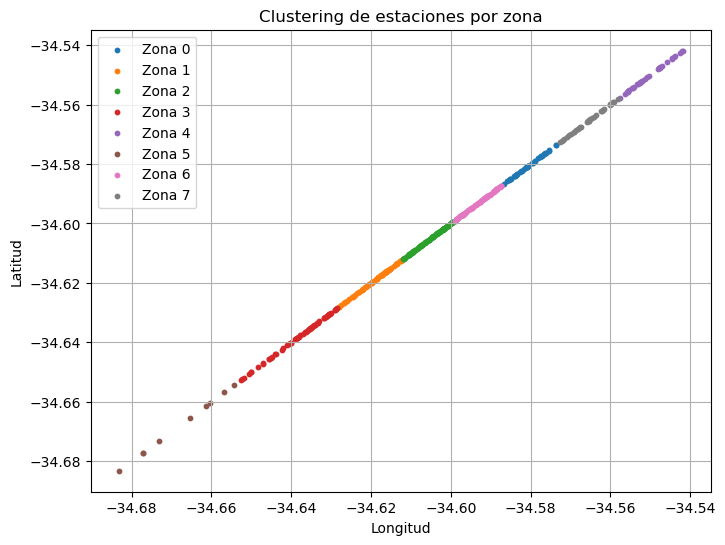

In [7]:
from modeling import construir_dataset_modelado

df_viajes_2020 = pd.read_csv("data/recorridos/processed/trips_2020_pr.csv")
df_usuarios_2020 = pd.read_csv("data/usuarios/processed/usuarios_ecobici_2020_limpio.csv")

df_modelado_2020 = construir_dataset_modelado(df_viajes_2020, df_usuarios_2020)

df_modelado_2020.to_csv("data/modelado/modelado_2020.csv", index=False)